In [1]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os, sys

def append_to_path(dir0): # A convenience function
    if dir0 not in sys.path:
        sys.path.append(dir0)

append_to_path(os.getcwd()+'/..')
import spikeinterface as si

append_to_path(os.getcwd()+'/../../spike-collab/widgets/timeserieswidget/')
from timeserieswidget import TimeseriesWidget

/home/mhennig/anaconda3/envs/idp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataset_directory = '/data/MEA/LightStim/P29_16_07_14'
ifile = 'P29_16_05_14_retina02_left_stim2_smallarray_fullfield_HDF5.brw'
ofile = 'P29_16_05_14_retina02_left_stim2_smallarray_fullfield_HDF5_clustered.hdf5'

# dataset_directory = '/data/MEA/LightStim/P147_27_02_18_Scnn1aDreadd'
# ifile = 'P147_27_02_18_Scnn1aDreadd_K-Test_cno10.brw'
# ofile = 'P147_27_02_18_Scnn1aDreadd_KTest_cno10_1mM_INT_v28.hdf5'

A = si.BiocamInputExtractor(dataset_directory=dataset_directory,
                            recording_files=ifile)

B = si.HS2OutputExtractor(dataset_directory=dataset_directory,
                          recording_files=ofile)

# 3Brain data format: 101 signal inversion -1.0
#       signal range:  -4125.0 -  4125.0
# Signal inversion looks like -1.0, guessing the right method for data access.
# If your results look strange, signal polarity is wrong.


In [3]:
print("Number of recording channels: %d" %A.getNumChannels())
print("Number of frames recorded: %d" %A.getNumFrames())
print("Sampling frequency: %f" %A.getSamplingFrequency())
print("Info channel 0:", A.getChannelInfo(0))
print("Number of units = "+str(len(B.getUnitIds())))

Number of recording channels: 1024
Number of frames recorded: 3148820
Sampling frequency: 23199.090358
Info channel 0: {'location': (33, 33)}
Number of units = 6862


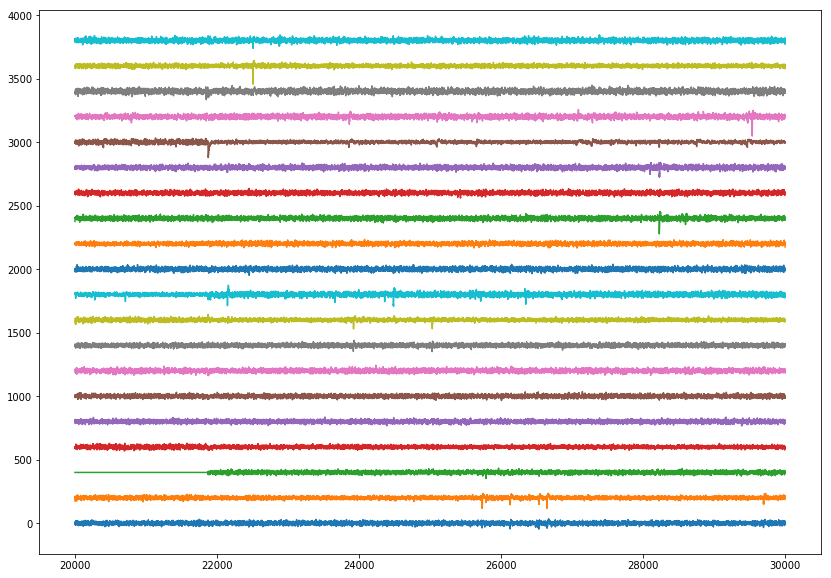

In [4]:
t0,t1 = 20000,30000
raw = A.getRawTraces(t0,t1,range(500,520))
plt.figure(figsize=(14,0.5*raw.shape[0]))
for i in range(raw.shape[0]):
    plt.plot(np.arange(t0,t1),raw[i]+i*200);

[180, 181]


(37.95591980689517, 38.04408019310484, 52.90662271688737, 54.05596533857718)

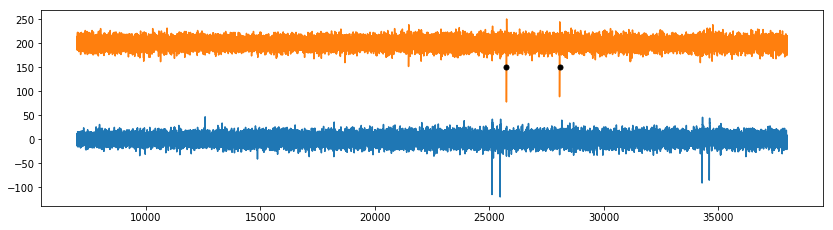

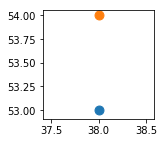

In [5]:
unit = 25

t  = B.getUnitSpikeTrain(unit)
ch = B.getUnitChannels(unit)
chs = list(set(ch))
print(chs)

t0 = 7000
t1 = 38000

raw = A.getRawTraces(t0,t1,chs)
plt.figure(figsize=(14,1.8*len(chs)))
for c in range(len(chs)):
    plt.plot(np.arange(t0,t1),raw[c]+c*200)
inds = np.where((t>=t0)&(t<t1))[0]
plt.plot(t[inds], np.array([np.where(c==chs)[0][0] for c in ch[inds]])*200-50,'ko',ms=5)
    
plt.figure(figsize=(2,2))
for c in range(len(chs)):
    l = A.getChannelInfo(chs[c])['location']
    plt.scatter(l[0],l[1], s=80)
plt.axis('equal')

In [6]:

W=TimeseriesWidget(
    input_extractor=A,
    output_extractor=B,
    channels=[1,2,3,4,5,6,7,8],
    trange=[0,3000]
)
W.display()